In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Fraud.csv")

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165439 entries, 0 to 165438
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            165439 non-null  int64  
 1   type            165439 non-null  object 
 2   amount          165439 non-null  float64
 3   nameOrig        165439 non-null  object 
 4   oldbalanceOrg   165439 non-null  float64
 5   newbalanceOrig  165439 non-null  float64
 6   nameDest        165439 non-null  object 
 7   oldbalanceDest  165438 non-null  float64
 8   newbalanceDest  165438 non-null  float64
 9   isFraud         165438 non-null  float64
 10  isFlaggedFraud  165438 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 13.9+ MB


In [ ]:
df.shape

(165439, 11)

# missing values

In [ ]:

null_values  = df.isna()
missing_count = df.isna().sum()
missing_count

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

# dropping nan vales

In [ ]:
df.dropna(inplace= True)

# checking for duplicates

In [ ]:
duplicate_values = {}
for column in df.columns:
    duplicate_values[column] = df[column][df[column].duplicated()].value_counts()

for column, value_counts in duplicate_values.items():
    print(f"Duplicate values in '{column}':")
    print(value_counts)

Duplicate values in 'step':
9     37627
11    37240
10    35990
8     21096
12    19479
7      6836
1      2707
6      1659
2      1013
5       664
4       564
3       551
Name: step, dtype: int64
Duplicate values in 'type':
PAYMENT     62236
CASH_OUT    54181
CASH_IN     33761
TRANSFER    13778
DEBIT        1477
Name: type, dtype: int64
Duplicate values in 'amount':
15155.72    2
25975.86    2
2475.13     2
11395.80    2
33902.60    2
           ..
10262.12    1
5991.55     1
21758.90    1
863.43      1
2383.07     1
Name: amount, Length: 1165, dtype: int64
Duplicate values in 'nameOrig':
C1709295811    1
C44568807      1
C260230637     1
Name: nameOrig, dtype: int64
Duplicate values in 'oldbalanceOrg':
0.0         53211
101.0          35
164.0          31
144.0          29
140.0          28
            ...  
19148.0         1
14880.0         1
252346.0        1
99227.0         1
31225.0         1
Name: oldbalanceOrg, Length: 10635, dtype: int64
Duplicate values in 'newbalanceOrig':
0

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,165438.000000,1.654380e+05,1.654380e+05,1.654380e+05,1.654380e+05,1.654380e+05,165438.000000,165438.0
mean,9.553700,1.793505e+05,8.862452e+05,9.031801e+05,9.229948e+05,1.185652e+06,0.000804,0.0
std,1.967743,3.360327e+05,2.812184e+06,2.848997e+06,2.380862e+06,2.690358e+06,0.028342,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,9.000000,1.141016e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,10.000000,6.376580e+04,1.951100e+04,0.000000e+00,3.956590e+04,1.070278e+05,0.000000,0.0
75%,11.000000,2.248485e+05,1.901123e+05,2.227973e+05,7.106599e+05,1.144234e+06,0.000000,0.0
max,12.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.894623e+07,3.904248e+07,1.000000,0.0


# unique values and number of unique values in each column

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'step': [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique values in column 'type': ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
Unique values in column 'amount': [9.8396400e+03 1.8642800e+03 1.8100000e+02 ... 2.0934940e+04 1.2283241e+05
 4.2462695e+05]
Unique values in column 'nameOrig': ['C1231006815' 'C1666544295' 'C1305486145' ... 'C150264052' 'C1327637933'
 'C944569458']
Unique values in column 'oldbalanceOrg': [170136.  21249.    181. ...   2709.  23958.  58972.]
Unique values in column 'newbalanceOrig': [160296.36  19384.72      0.   ...  24606.32   1141.5  483598.95]
Unique values in column 'nameDest': ['M1979787155' 'M2044282225' 'C553264065' ... 'M1708280162' 'M806755072'
 'C475670359']
Unique values in column 'oldbalanceDest': [     0.    21182.    41898.   ... 210429.52 457184.37  11507.  ]
Unique values in column 'newbalanceDest': [     0.    40348.79 157982.12 ...  51273.32 301447.79 137631.63]
Unique values in column 'isFraud': [0. 1.]
Unique val

In [ ]:
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'step': 12
Unique values in column 'type': 5
Unique values in column 'amount': 164258
Unique values in column 'nameOrig': 165435
Unique values in column 'oldbalanceOrg': 89553
Unique values in column 'newbalanceOrig': 77070
Unique values in column 'nameDest': 80483
Unique values in column 'oldbalanceDest': 90918
Unique values in column 'newbalanceDest': 39110
Unique values in column 'isFraud': 2
Unique values in column 'isFlaggedFraud': 1


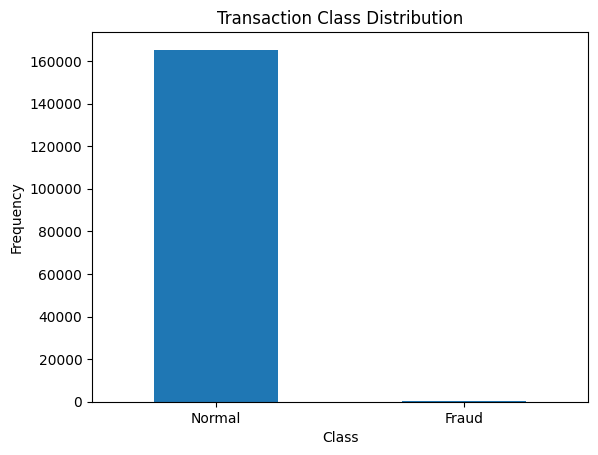

In [ ]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(df['isFraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [ ]:
df.isFraud.value_counts()

0.0    165305
1.0       133
Name: isFraud, dtype: int64

Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

<ipython-input-52-58a91daa7c6b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


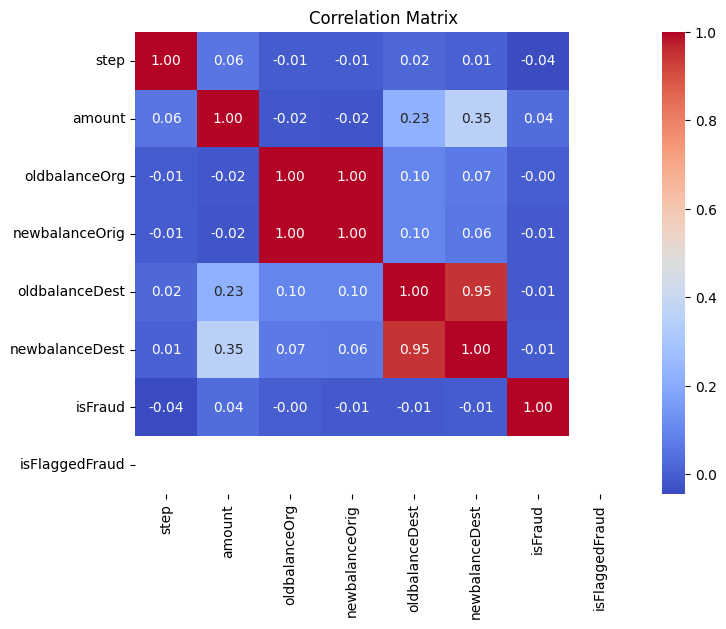

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

oldbalance and new balanceOrig shows the strong positive correlation with 1 we can take only one column this will not affect our model accuracy

In [ ]:
selected_columns = ["type","amount","newbalanceOrig","oldbalanceOrg","oldbalanceDest","newbalanceDest", "isFraud"]
ndf = df[selected_columns]

In [ ]:
newdf = pd.get_dummies(ndf, columns = ['type'])
newdf.head()

,amount,newbalanceOrig,oldbalanceOrg,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,160296.36,170136.0,0.0,0.0,0.0,0,0,0,1,0
1,1864.28,19384.72,21249.0,0.0,0.0,0.0,0,0,0,1,0
2,181.00,0.00,181.0,0.0,0.0,1.0,0,0,0,0,1
3,181.00,0.00,181.0,21182.0,0.0,1.0,0,1,0,0,0
4,11668.14,29885.86,41554.0,0.0,0.0,0.0,0,0,0,1,0


In [ ]:
newdf.groupby("isFraud").mean()

,amount,newbalanceOrig,oldbalanceOrg,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
isFraud,,,,,,,,,,
0.0,179005.933191,903886.367562,886473.344896,923553.115764,1.186056e+06,0.204241,0.327365,0.008941,0.376498,0.082956
1.0,607574.272331,25363.429398,602742.375113,229057.509624,6.828155e+05,0.000000,0.503759,0.000000,0.000000,0.496241


In [ ]:
X = newdf.drop(columns = "isFraud", axis = 1)
y = newdf["isFraud"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify= y, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(165438, 10) (132350, 10) (33088, 10) (132350,) (33088,)


# Building Logistic Model

In [ ]:
model  = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
x_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [ ]:
x_test_prediction = model.predict(X_test)
test_data_accuracy =  accuracy_score(x_test_prediction, y_test)


In [ ]:
print(confusion_matrix(x_train_prediction, y_train))
print(classification_report(x_train_prediction, y_train))

[[132206     27]
 [    38     79]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    132233
         1.0       0.75      0.68      0.71       117

    accuracy                           1.00    132350
   macro avg       0.87      0.84      0.85    132350
weighted avg       1.00      1.00      1.00    132350



In [ ]:
print(confusion_matrix(x_test_prediction, y_test))
print(classification_report(x_test_prediction, y_test))

[[33051    12]
 [   10    15]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     33063
         1.0       0.56      0.60      0.58        25

    accuracy                           1.00     33088
   macro avg       0.78      0.80      0.79     33088
weighted avg       1.00      1.00      1.00     33088



# since this is an imbalanced data and we are working with the oversampling problem we can not believe this result
# now we will use smote

In [ ]:
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.linear_model import Lasso,LassoCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline

In [ ]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN

sm = SMOTE(random_state=42)
x_over, y_over = sm.fit_resample(X_train, y_train)

In [ ]:
np.bincount(y_over)

array([132244, 132244])

In [ ]:
model1 = LogisticRegression()
model1.fit(x_over, y_over)
train_pred = model1.predict(x_over)
pred = model1.predict(X_test)

In [ ]:
print(confusion_matrix(train_pred, y_over))
print(classification_report(train_pred, y_over))

[[117904   6811]
 [ 14340 125433]]
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92    124715
         1.0       0.95      0.90      0.92    139773

    accuracy                           0.92    264488
   macro avg       0.92      0.92      0.92    264488
weighted avg       0.92      0.92      0.92    264488



In [ ]:
print(confusion_matrix(pred, y_test))
print(classification_report(pred, y_test))

[[29373     5]
 [ 3688    22]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     29378
         1.0       0.81      0.01      0.01      3710

    accuracy                           0.89     33088
   macro avg       0.85      0.50      0.48     33088
weighted avg       0.88      0.89      0.84     33088



**HERE WE ARE GETTING OVERFITTING PROBLEM THEREFORE IN TRAINING DATASET WE GOT GOOD RESULT BUT THE TEST RESULT IS NOT GOOD**

NOW WE WILL TRY ANOTHER OVERSAMPLING METHOD ADASYN OR BORDERLINESMOTE**

In [ ]:
sm1 = BorderlineSMOTE(random_state = 42)
x_bsm, y_bsm = sm1.fit_resample(X_train, y_train)

In [ ]:
model1.fit(x_bsm, y_bsm)
x_b_prediction = model1.predict(X_test)
print(confusion_matrix(x_b_prediction, y_test))
print(classification_report(x_b_prediction, y_test))

[[31355     7]
 [ 1706    20]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     31362
         1.0       0.74      0.01      0.02      1726

    accuracy                           0.95     33088
   macro avg       0.84      0.51      0.50     33088
weighted avg       0.94      0.95      0.92     33088



In [ ]:
sm1 = ADASYN(random_state = 42)
x_ad, y_ad = sm1.fit_resample(X_train, y_train)
model1.fit(x_ad, y_ad)
x_b_prediction = model1.predict(X_test)
print(confusion_matrix(x_b_prediction, y_test))
print(classification_report(x_b_prediction, y_test))

[[28974     4]
 [ 4087    23]]
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93     28978
         1.0       0.85      0.01      0.01      4110

    accuracy                           0.88     33088
   macro avg       0.86      0.50      0.47     33088
weighted avg       0.87      0.88      0.82     33088



# "We're switching to a new model because we found that Borderline SMOTE and ADASYN caused overfitting. We're trying out Random Forest now because it's better at handling overfitting.

In [ ]:
rf = RandomForestClassifier( random_state = 42)
rf.fit(x_bsm, y_bsm)
rf_predict = rf.predict(X_test)

In [ ]:
print(confusion_matrix(rf_predict, y_test))
print(classification_report(rf_predict, y_test))

[[1270508     206]
 [    373    1437]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270714
           1       0.87      0.79      0.83      1810

    accuracy                           1.00   1272524
   macro avg       0.94      0.90      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524

